In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d=pd.read_excel("dat.xlsx")
d

,Temp,Tk,rho_gl,rho,d,T,l,vust,n
0,NaN,293,NaN,2.5,NaN,66.66,22.2,0.003330,NaN
1,NaN,293,NaN,NaN,NaN,67.50,22.2,0.003289,NaN
2,20.0,293,1.26,2.5,2.10,68.28,22.2,0.003251,0.916637
3,20.0,293,1.26,2.5,2.10,68.63,22.2,0.003235,0.921335
4,20.0,293,1.26,7.8,0.80,90.31,22.2,0.002458,0.927977
5,20.0,293,1.26,7.8,0.70,118.62,22.2,0.001872,0.933201
6,20.0,293,1.26,7.8,0.70,60.40,11.0,0.001821,0.958991
7,25.0,298,1.26,2.5,2.10,42.88,22.2,0.005177,0.575650
8,25.0,298,1.26,2.5,2.00,49.14,22.2,0.004518,0.598357
9,25.0,298,1.26,2.5,2.00,46.72,22.2,0.004752,0.568890


In [3]:
Tl=sorted(list(set(d[~np.isnan(d.Temp)].Temp)))
T=np.zeros(0)
nu=np.zeros(0)
k=0
for tt in Tl:
    T=np.append(T,d[d.Temp==tt].Temp+273)
    nu=np.append(nu,d[d.Temp==tt].n)
    k+=1

In [4]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return np.array([k,b,np.abs(sigk/k),np.abs(sigb/b)])

In [5]:
X=1/T
Y=np.log(nu/nu[-1])

In [16]:
a,b,sa,sb=getkb(X,Y)
a,sa,a*sa

(np.float64(6732.724478741565),
 np.float64(0.017292498962493127),
 np.float64(116.42563106339058))

In [15]:
a*1.38e-23*sa

np.float64(1.60667370867479e-21)

In [8]:
epnu=np.sqrt((2*0.01/0.7)**2+(0.1/11)**2+(0.5/60)**2)
epnu,

np.float64(0.031119376651145555)

<function matplotlib.pyplot.savefig(*args, **kwargs) -> 'None'>

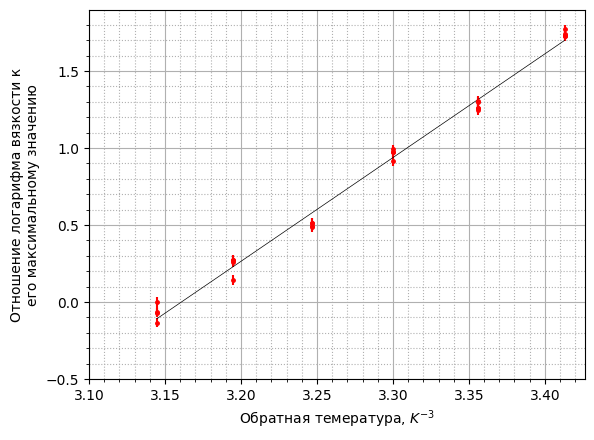

In [9]:
plt.errorbar(X*1000,Y,fmt='.r',xerr=0, yerr=epnu,markersize=5)
plt.plot(X*1000,a*X+b,'black',linewidth=0.5)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.ylim(ymin=plt.gca().get_yticks()[0])
plt.xlim(xmin=plt.gca().get_xticks()[0])
plt.xlabel("Обратная темература, $K^{-3}$")
plt.ylabel("Отношение логарифма вязкости к\nего максимальному значению")
plt.savefig

In [13]:
125500*92/(6e23),87500*92/(6e23)

(1.9243333333333333e-17, 1.3416666666666667e-17)

In [14]:
58000/(6e23)

9.666666666666667e-20